In [2]:
import numpy as np 
import pandas as pd 
import csv 
import glob 
import os 
from PIL import Image
import time 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


In [3]:
## getting an idea of the labels file 
label = pd.read_csv("input/train_masks.csv")
label.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [4]:
## function to show an image

def imageshow(path_file):
    im = Image.open(path_file)
    print(im)
    plt.imshow(im)
    plt.show()
    
# imageshow(filelist[1])

In [5]:
filelist = glob.glob('input/train/train/*.tif')
# print(filelist[0:4])
for i in range(4):
    print(filelist[i])
    plt.figure()
    imageshow(filelist[i])


input/train/train\10_1.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=580x420 at 0x1E468403EF0>


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

input/train/train\10_10.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=580x420 at 0x1E468B716D8>


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

input/train/train\10_100.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=580x420 at 0x1E468D245F8>


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

input/train/train\10_100_mask.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=580x420 at 0x1E468D577F0>


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [8]:
## get file names for all images with are enalrged and not masked 

def plot_image(img, title=None):
    plt.figure()
    plt.title(title)
    plt.imshow(img)
    plt.show()
    
# masks_img = [ img for img in glob.glob("input/train/train/*.tif") if 'mask' in img]
def image_with_mask(img, mask):
    # returns a copy of the image with edges of the mask added in red
    img_color = grays_to_RGB(img)
    mask_edges = cv2.Canny(mask, 100, 200) > 0  
    img_color[mask_edges, 0] = 255  # set channel 0 to bright red, green & blue channels to 0
    img_color[mask_edges, 1] = 255
    img_color[mask_edges, 2] = 0
    return img_color

def duplicate_mask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
#     print(dirname)
#     print(basename)
    maskname = basename.replace(".tif", "_mask.tif")
    
    return os.path.join(dirname, maskname)

def isempty(image):
#     im = plt.imread(image)
    return sum(image.flatten())>0


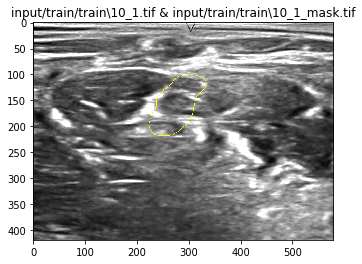

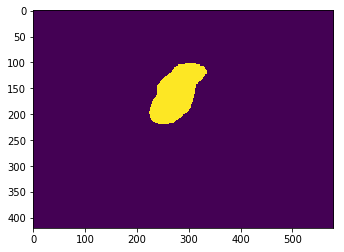

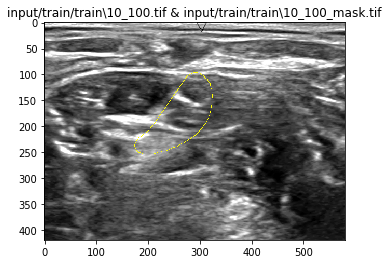

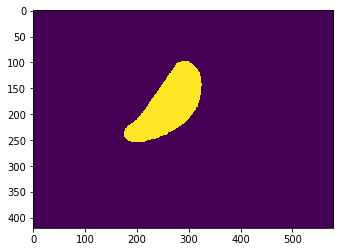

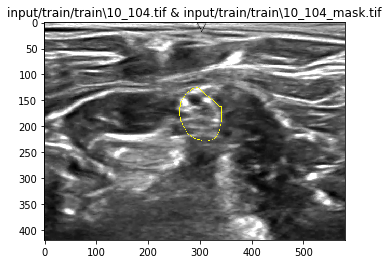

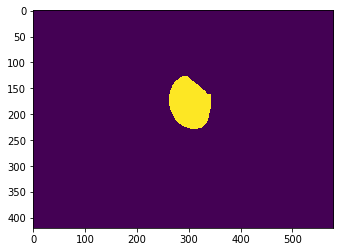

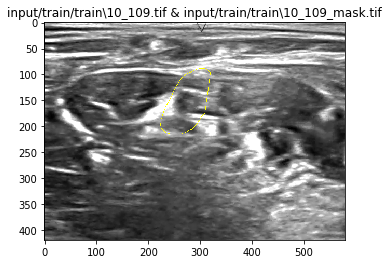

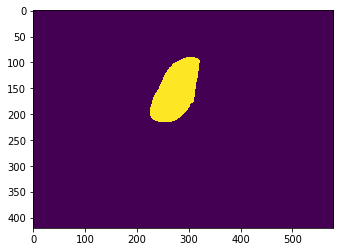

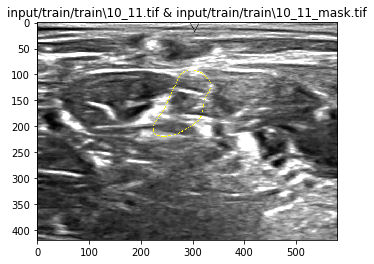

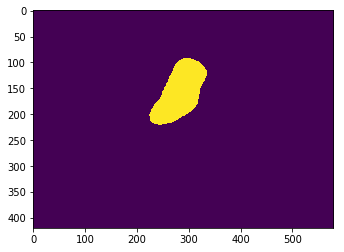

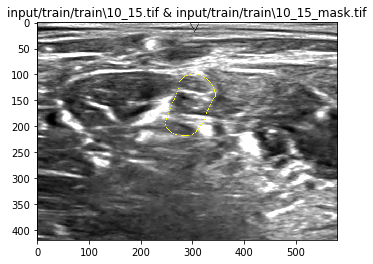

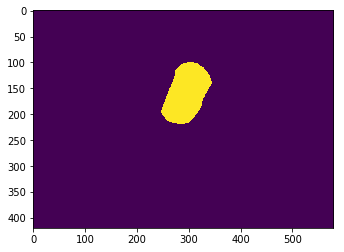

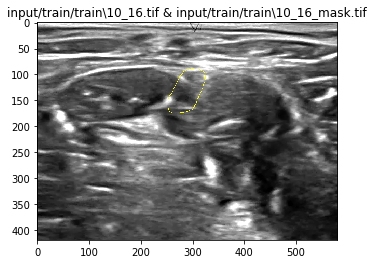

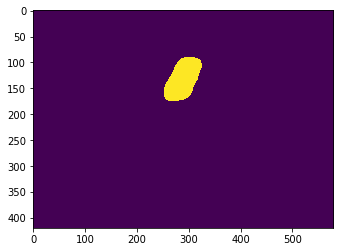

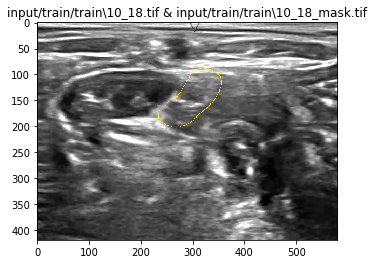

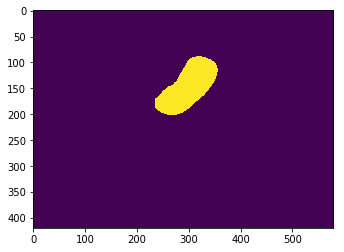

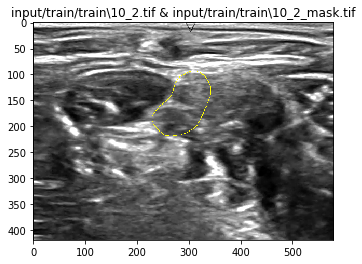

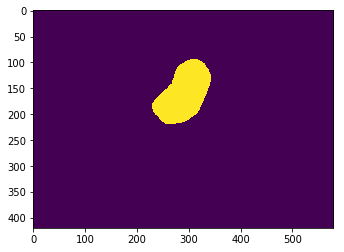

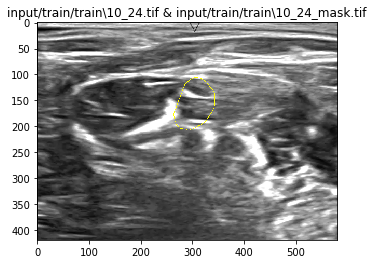

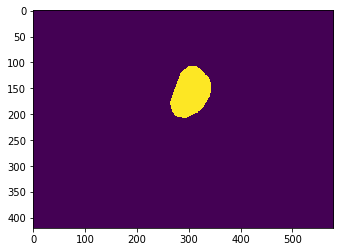

In [9]:

    
def grays_to_RGB(img):
    # turn 2D grayscale image into grayscale RGB
    return np.dstack((img, img, img)) 
        

def main():
    ultrasound_img = [img for img in glob.glob("input/train/train/*.tif") if 'mask' not in img]
    masks_img = [duplicate_mask(fimg) for fimg in ultrasound_img]
    map_dict = zip(ultrasound_img,masks_img)
    images_shown = 0
    for i , j in map_dict:
        ult_img = plt.imread(i) 
        mask_img = plt.imread(j)
         
        
        if isempty(mask_img):
            
            overlay_img = i + " & " +j 
            plot_image(image_with_mask(ult_img, mask_img), title=overlay_img)
            file_name= Image.open(j)
            np_im = np.array(file_name)
            plt.imshow(np_im)
            images_shown += 1

            if images_shown >= 10:
                break 
                
    
main()

In [10]:
file_name= Image.open('1_1.tif')
np_im = np.array(file_name)
# file_name.show()
